In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


In [2]:
dataset = pd.read_csv("Covid.csv")

In [3]:
dataset

,Unnamed: 0,BreathingProblem,Fever,DryCough,Sorethroat,RunningNose,Asthma,ChronicLungDisease,Headache,HeartDisease,Diabetes,HyperTension,Fatigue,Gastrointestinal,Contact with COVID Patient,WearingMasks,COVID-19
0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,1
1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1
2,2,1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1
3,3,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1
4,4,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,453,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
454,454,1,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1
455,455,0,0,1,0,0,1,1,0,1,1,0,0,1,1,0,1
456,456,1,0,0,0,1,0,1,1,0,1,0,1,1,1,0,1


In [4]:
dataset.drop("Unnamed: 0",inplace=True,axis=1)

In [5]:
dataset=dataset.drop_duplicates()

In [6]:
dataset.head()

,BreathingProblem,Fever,DryCough,Sorethroat,RunningNose,Asthma,ChronicLungDisease,Headache,HeartDisease,Diabetes,HyperTension,Fatigue,Gastrointestinal,Contact with COVID Patient,WearingMasks,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1


In [7]:
dataset.columns

Index(['BreathingProblem', 'Fever', 'DryCough', 'Sorethroat', 'RunningNose',
       'Asthma', 'ChronicLungDisease', 'Headache', 'HeartDisease', 'Diabetes',
       'HyperTension', 'Fatigue ', 'Gastrointestinal ',
       'Contact with COVID Patient', 'WearingMasks', 'COVID-19'],
      dtype='object')

In [8]:
dataset.describe()

,BreathingProblem,Fever,DryCough,Sorethroat,RunningNose,Asthma,ChronicLungDisease,Headache,HeartDisease,Diabetes,HyperTension,Fatigue,Gastrointestinal,Contact with COVID Patient,WearingMasks,COVID-19
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.0,458.000000
mean,0.646288,0.703057,0.716157,0.615721,0.497817,0.460699,0.502183,0.517467,0.497817,0.489083,0.480349,0.517467,0.462882,0.458515,0.0,0.825328
std,0.478644,0.457411,0.451354,0.486956,0.500542,0.498998,0.500542,0.500241,0.500542,0.500427,0.500160,0.500241,0.499166,0.498821,0.0,0.380102
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [9]:
missing_values=dataset.isnull().sum() # missing values

percent_missing = dataset.isnull().sum()/dataset.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
BreathingProblem,0,0.0
Fever,0,0.0
DryCough,0,0.0
Sorethroat,0,0.0
RunningNose,0,0.0
Asthma,0,0.0
ChronicLungDisease,0,0.0
Headache,0,0.0
HeartDisease,0,0.0
Diabetes,0,0.0


In [10]:
target = dataset['COVID-19']

In [11]:
dataset

,BreathingProblem,Fever,DryCough,Sorethroat,RunningNose,Asthma,ChronicLungDisease,Headache,HeartDisease,Diabetes,HyperTension,Fatigue,Gastrointestinal,Contact with COVID Patient,WearingMasks,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
454,1,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1
455,0,0,1,0,0,1,1,0,1,1,0,0,1,1,0,1
456,1,0,0,0,1,0,1,1,0,1,0,1,1,1,0,1


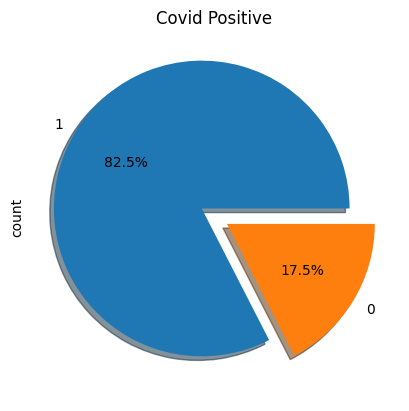

In [12]:
dataset["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Covid Positive');

<Axes: xlabel='COVID-19', ylabel='count'>

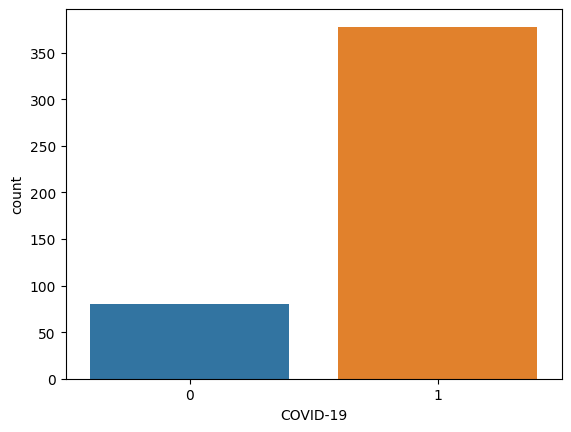

In [13]:
sns.countplot(x='COVID-19', data=dataset)

<Axes: xlabel='COVID-19', ylabel='count'>

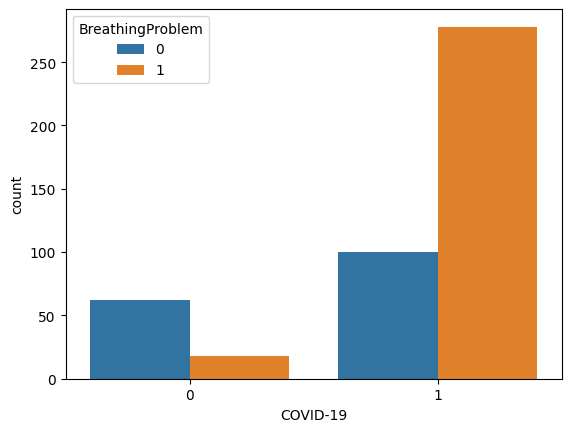

In [14]:
sns.countplot(x='COVID-19', hue='BreathingProblem', data=dataset)

<Axes: xlabel='COVID-19', ylabel='count'>

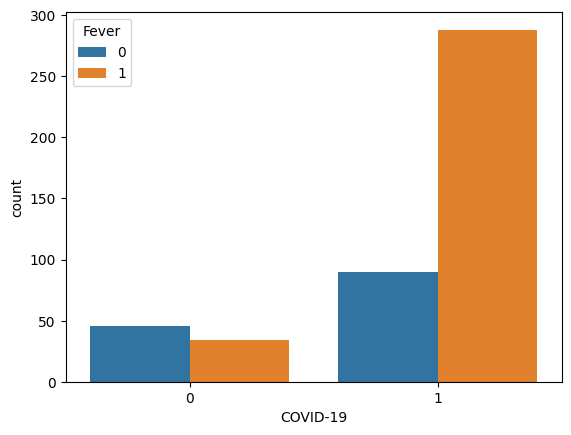

In [15]:
sns.countplot(x='COVID-19', hue='Fever', data=dataset)

<Axes: xlabel='COVID-19', ylabel='count'>

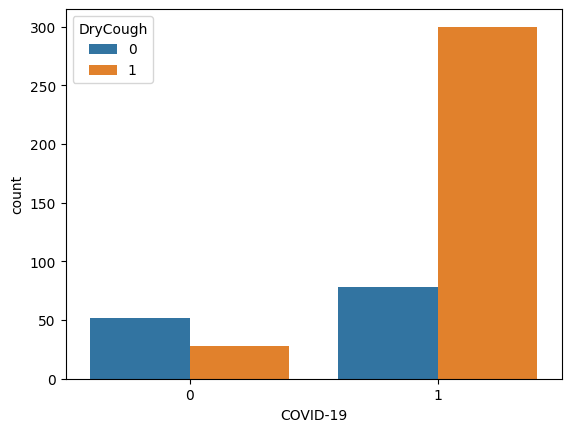

In [16]:
sns.countplot(x='COVID-19', hue='DryCough', data=dataset)

In [17]:
dataset.columns

Index(['BreathingProblem', 'Fever', 'DryCough', 'Sorethroat', 'RunningNose',
       'Asthma', 'ChronicLungDisease', 'Headache', 'HeartDisease', 'Diabetes',
       'HyperTension', 'Fatigue ', 'Gastrointestinal ',
       'Contact with COVID Patient', 'WearingMasks', 'COVID-19'],
      dtype='object')

In [18]:
new_dataset=dataset

<Axes: xlabel='COVID-19', ylabel='count'>

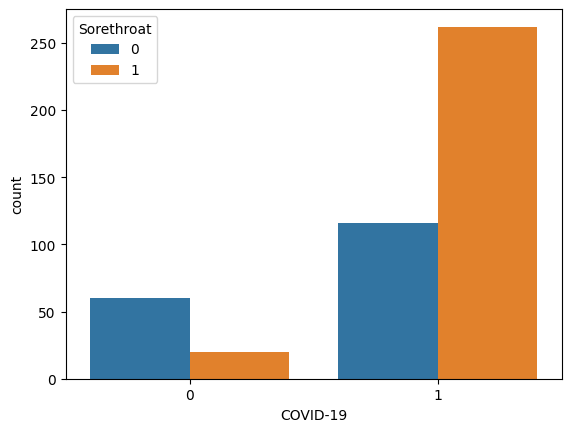

In [19]:
sns.countplot(x='COVID-19', hue='Sorethroat', data=new_dataset)

<Axes: xlabel='COVID-19', ylabel='count'>

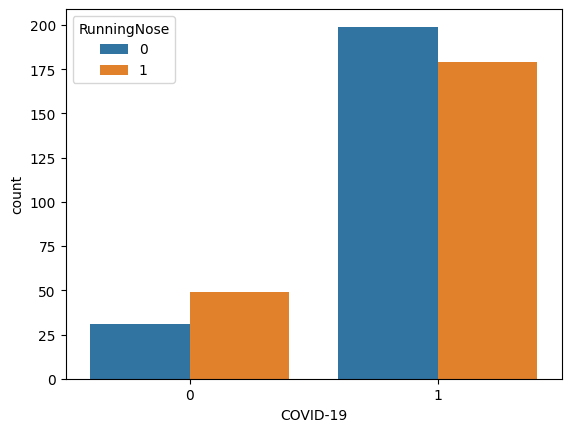

In [20]:
sns.countplot(x='COVID-19', hue='RunningNose', data=new_dataset)

<Axes: xlabel='COVID-19', ylabel='count'>

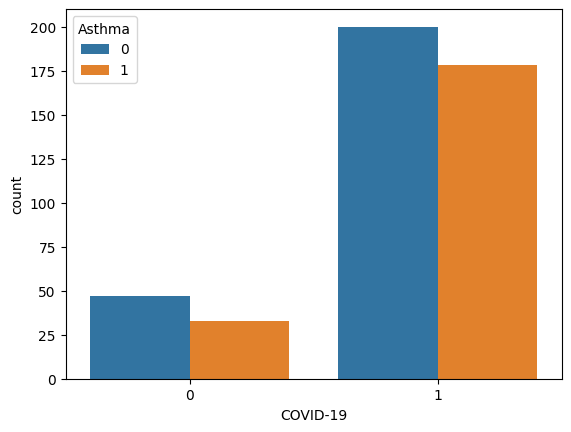

In [21]:
sns.countplot(x='COVID-19', hue='Asthma', data=new_dataset)

<Axes: xlabel='COVID-19', ylabel='count'>

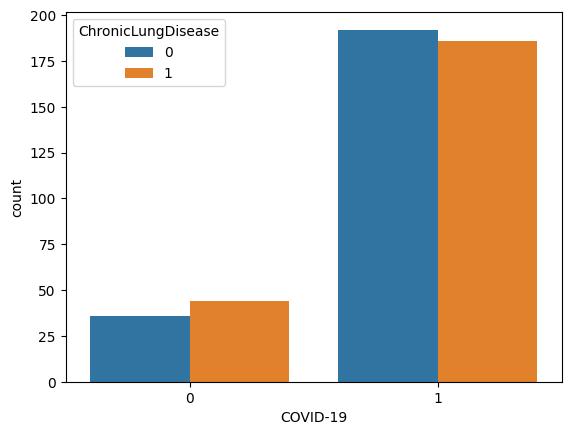

In [22]:
sns.countplot(x='COVID-19', hue='ChronicLungDisease', data=new_dataset)

<Axes: xlabel='COVID-19', ylabel='count'>

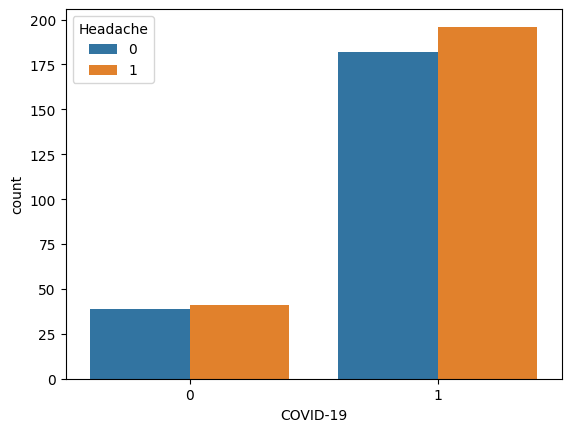

In [23]:
sns.countplot(x='COVID-19', hue='Headache', data=new_dataset)

<Axes: xlabel='COVID-19', ylabel='count'>

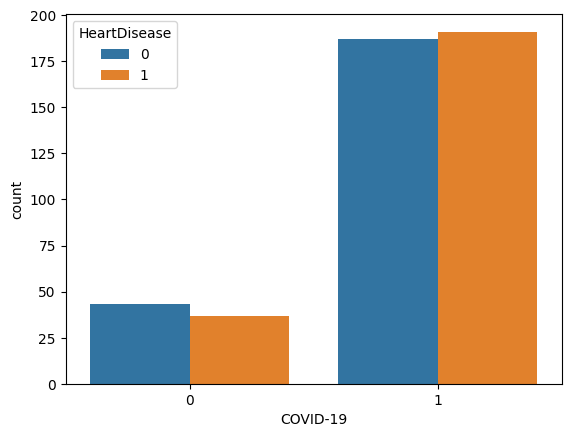

In [24]:
sns.countplot(x='COVID-19', hue='HeartDisease', data=new_dataset)

<Axes: xlabel='COVID-19', ylabel='count'>

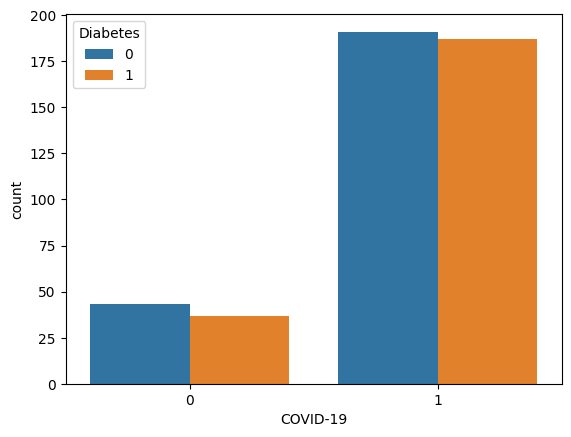

In [25]:
sns.countplot(x='COVID-19', hue='Diabetes', data=new_dataset)

<Axes: xlabel='COVID-19', ylabel='count'>

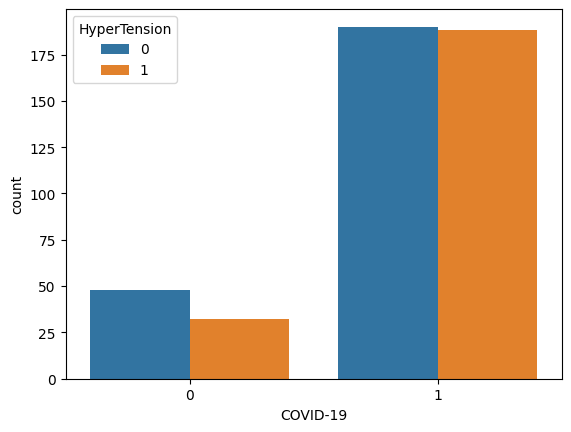

In [26]:
sns.countplot(x='COVID-19', hue='HyperTension', data=new_dataset)

<Axes: xlabel='COVID-19', ylabel='count'>

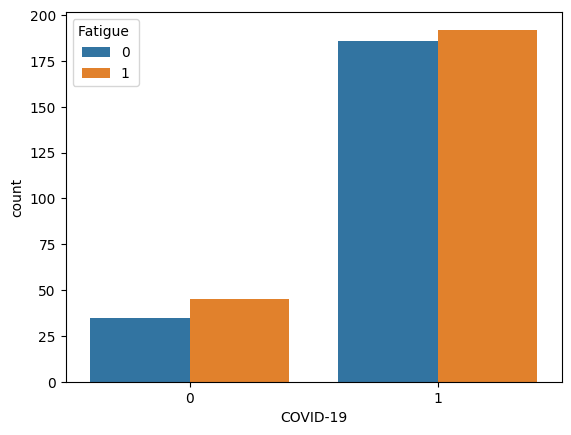

In [27]:
sns.countplot(x='COVID-19', hue='Fatigue ', data=new_dataset)

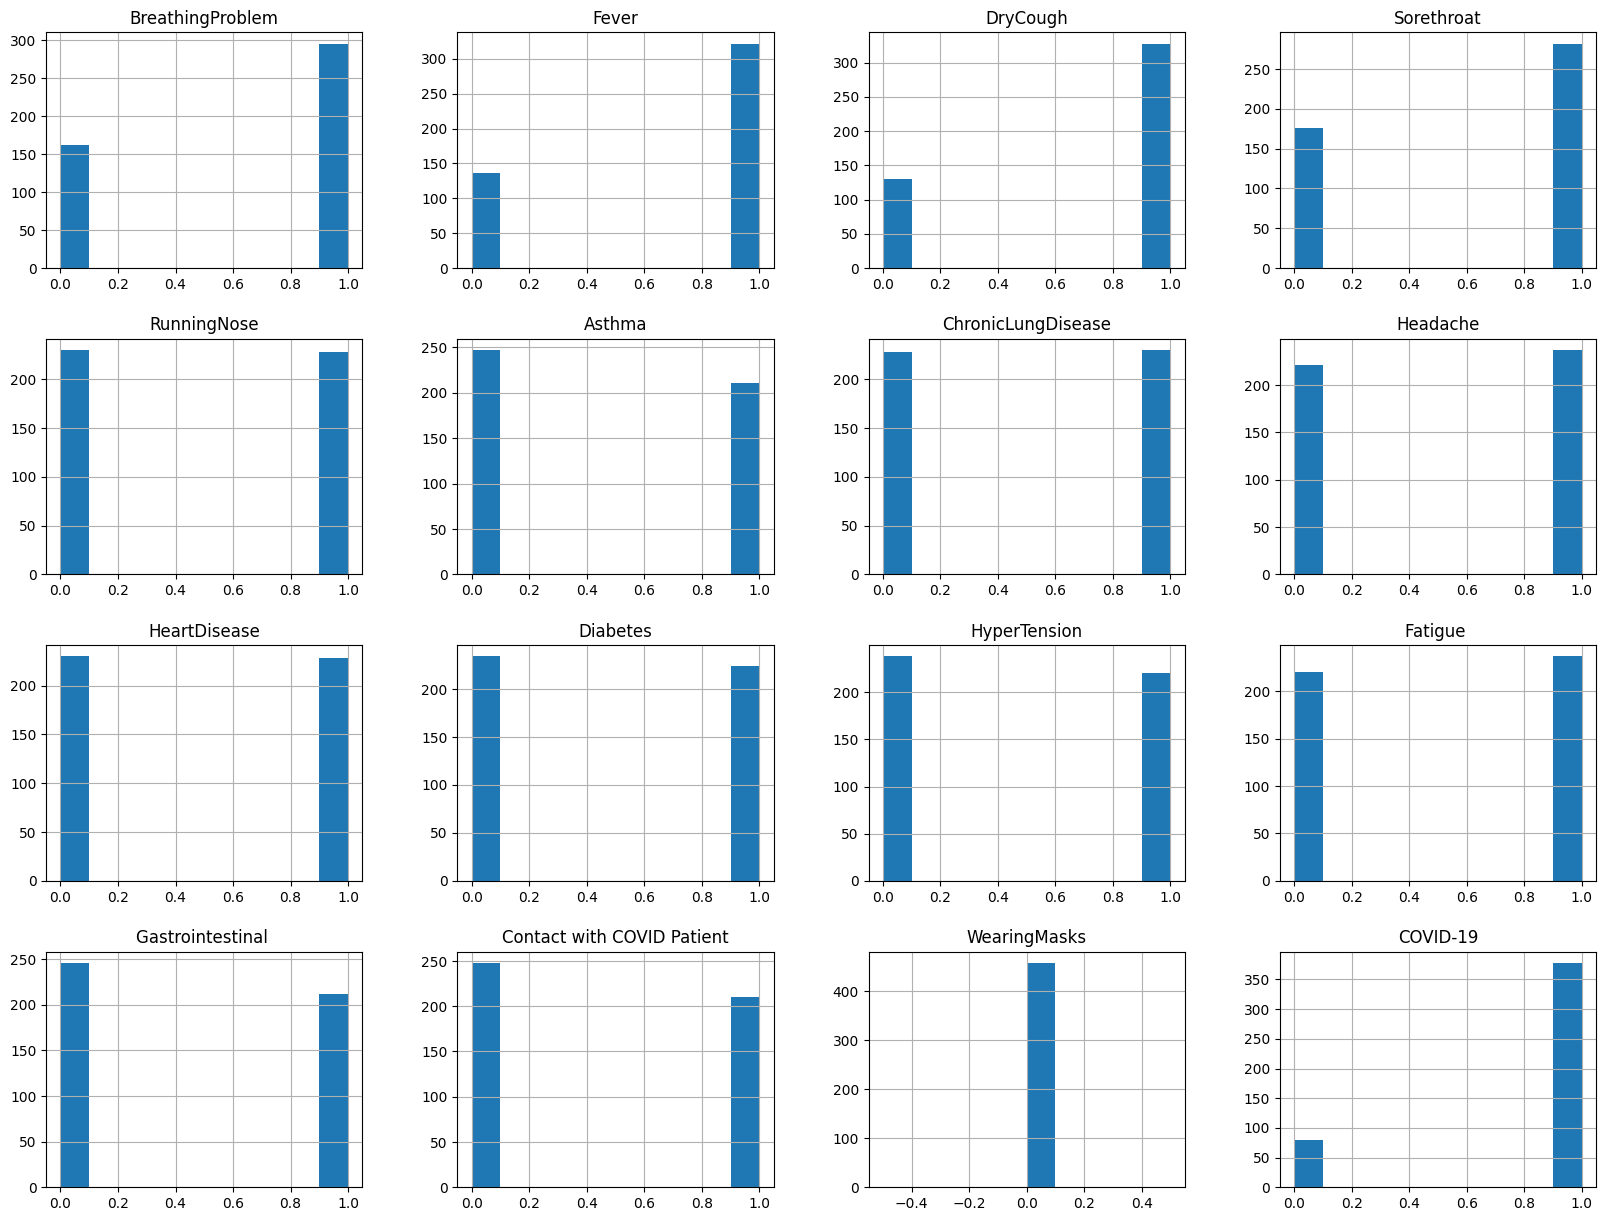

In [28]:
dataset.hist(figsize=(20,15));

<Axes: >

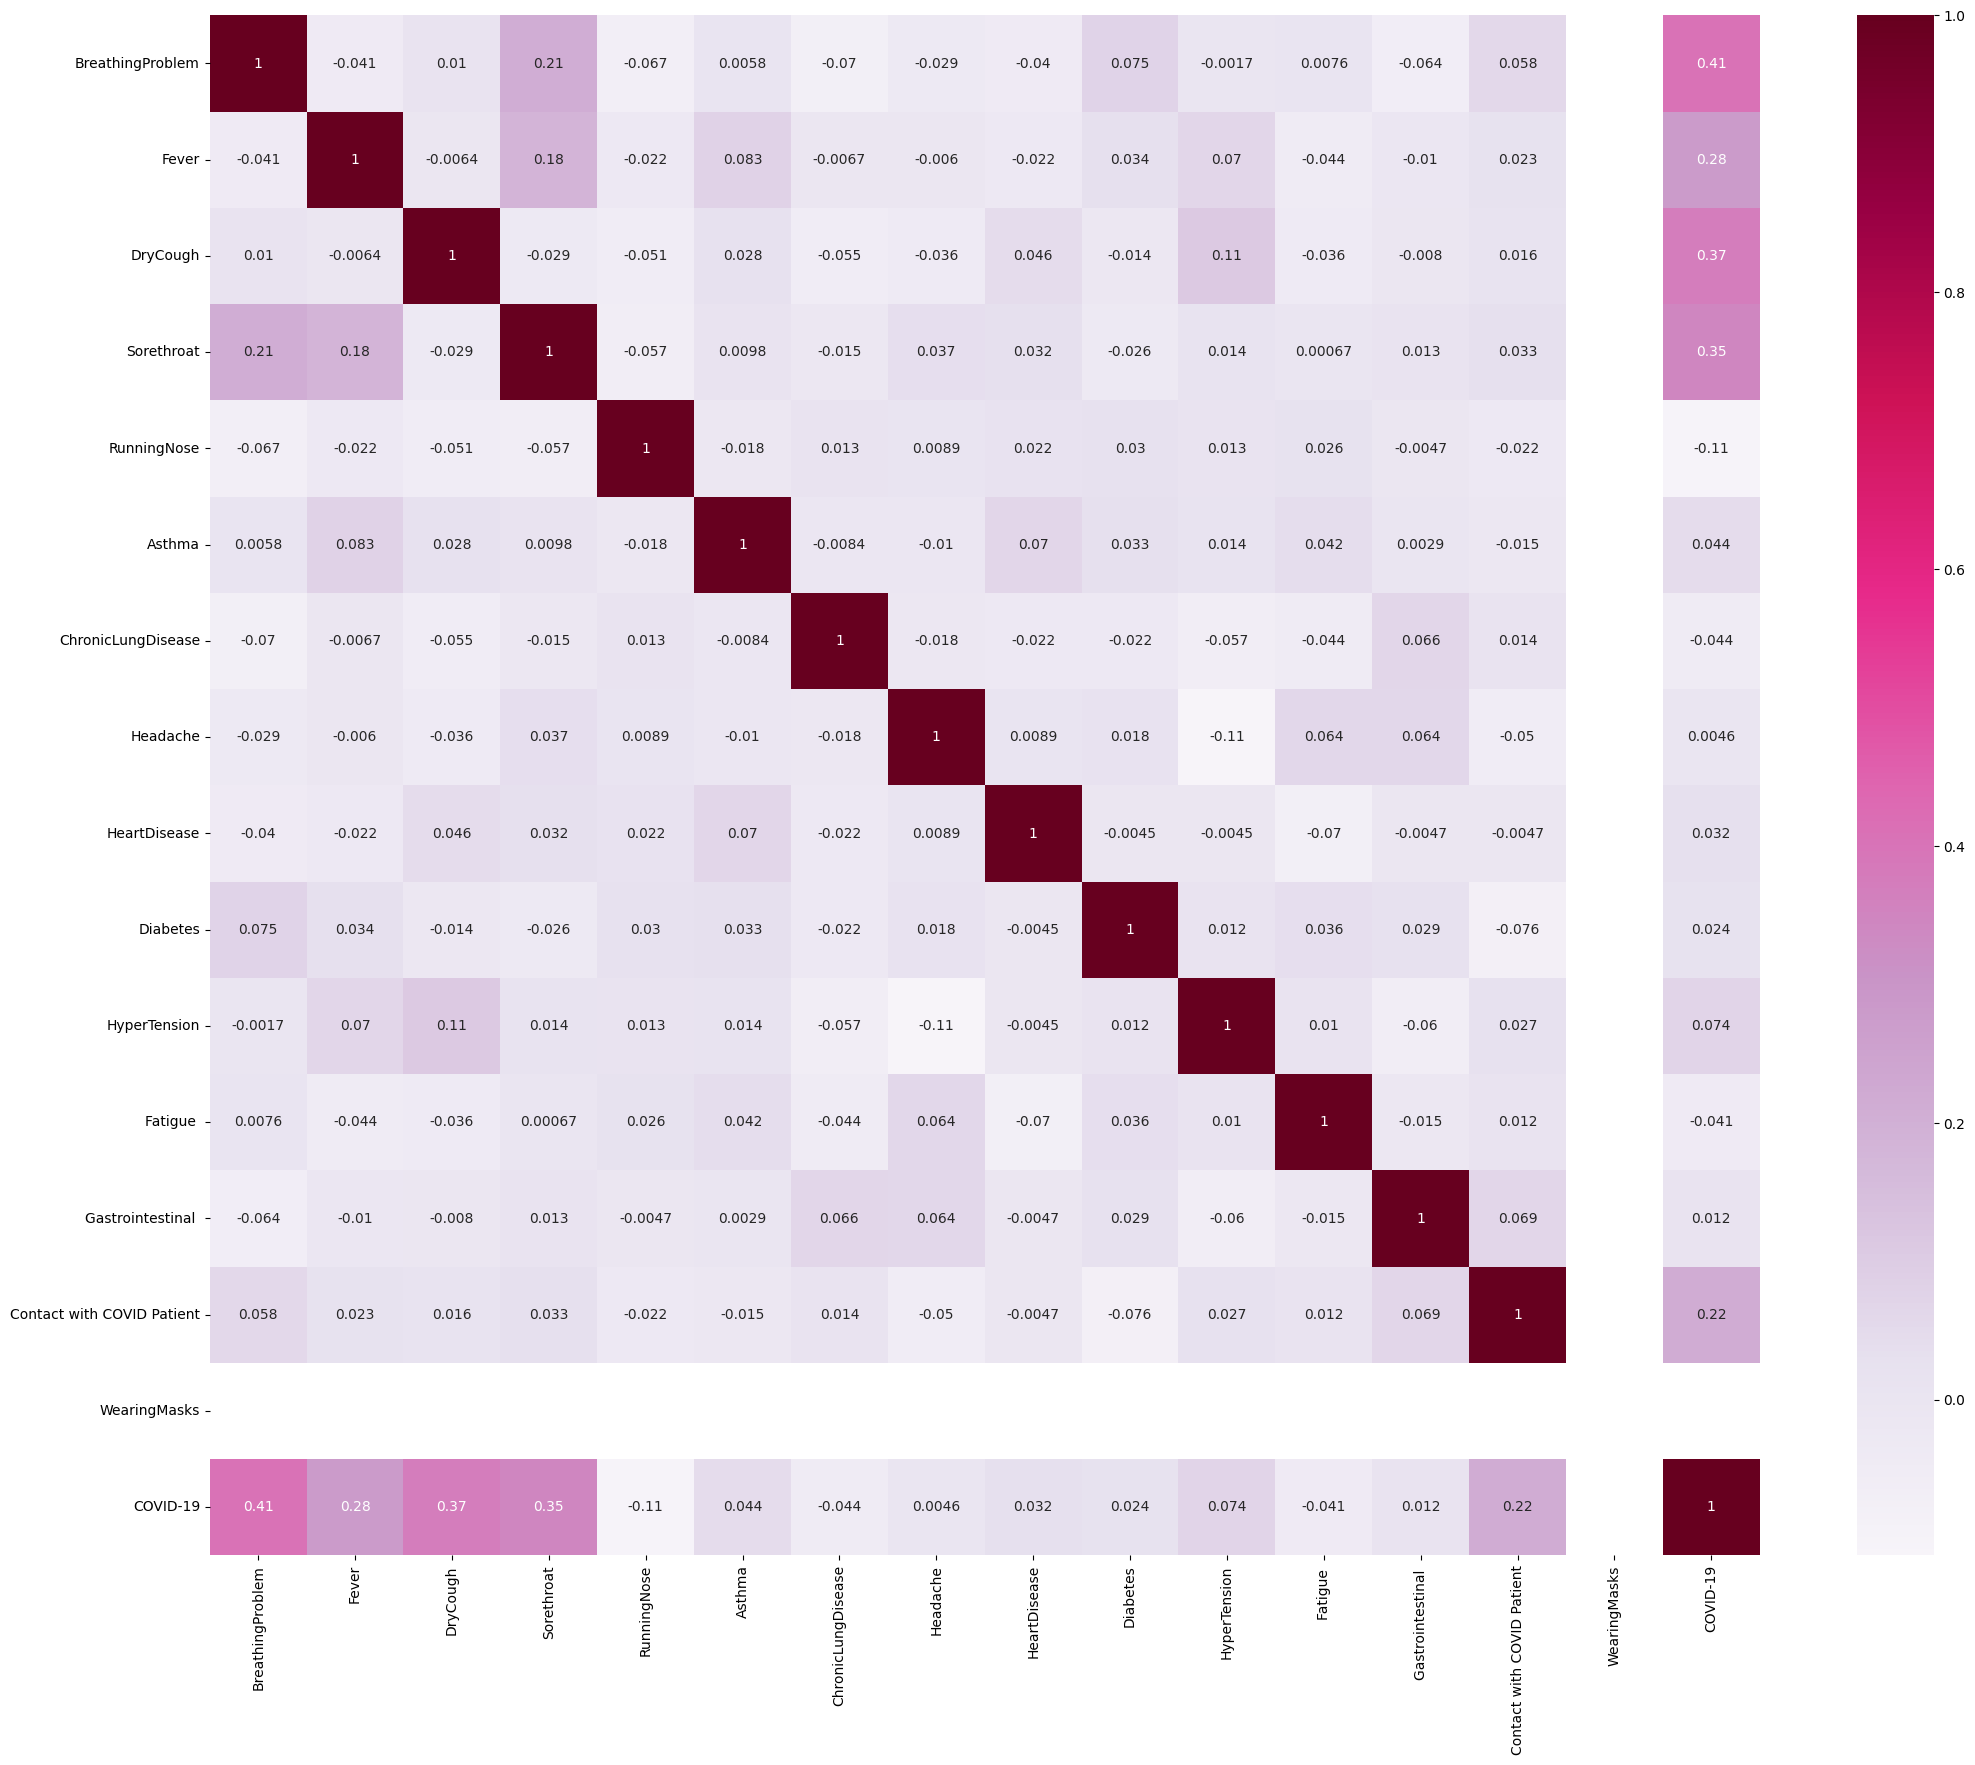

In [29]:
plt.figure(figsize=(25,20))
sns.heatmap(dataset.corr(), annot=True, cmap="PuRd")

In [30]:
# dataset.columns.value_counts()
cols = dataset.columns
cols

for col in cols:
    print(col)
    print(dataset[col].value_counts())
    print("")
    print("")

BreathingProblem
BreathingProblem
1    296
0    162
Name: count, dtype: int64


Fever
Fever
1    322
0    136
Name: count, dtype: int64


DryCough
DryCough
1    328
0    130
Name: count, dtype: int64


Sorethroat
Sorethroat
1    282
0    176
Name: count, dtype: int64


RunningNose
RunningNose
0    230
1    228
Name: count, dtype: int64


Asthma
Asthma
0    247
1    211
Name: count, dtype: int64


ChronicLungDisease
ChronicLungDisease
1    230
0    228
Name: count, dtype: int64


Headache
Headache
1    237
0    221
Name: count, dtype: int64


HeartDisease
HeartDisease
0    230
1    228
Name: count, dtype: int64


Diabetes
Diabetes
0    234
1    224
Name: count, dtype: int64


HyperTension
HyperTension
0    238
1    220
Name: count, dtype: int64


Fatigue 
Fatigue 
1    237
0    221
Name: count, dtype: int64


Gastrointestinal 
Gastrointestinal 
0    246
1    212
Name: count, dtype: int64


Contact with COVID Patient
Contact with COVID Patient
0    248
1    210
Name: count, dtype: int64


In [31]:
# {from FeatureImportance import feature_importance
# feature_importance = FeatureImportance(dataset)
# feature_importance.plot(top_n_features=25)}

In [32]:
dataset.count()

BreathingProblem              458
Fever                         458
DryCough                      458
Sorethroat                    458
RunningNose                   458
Asthma                        458
ChronicLungDisease            458
Headache                      458
HeartDisease                  458
Diabetes                      458
HyperTension                  458
Fatigue                       458
Gastrointestinal              458
Contact with COVID Patient    458
WearingMasks                  458
COVID-19                      458
dtype: int64

In [33]:
  # ["Fever", "Dry cough", "Fatigue",  "Sore throat", "Diarrhea", "Headache", "Breathing Problem",  "Chronic Lung Disease", 'Running Nose', "Pressure chest", 'Heart Disease','Hyper Tension', 'Gastrointestinal ', 'Contact with COVID Patient','WearingMasks'],
 

In [34]:
dataset.columns

Index(['BreathingProblem', 'Fever', 'DryCough', 'Sorethroat', 'RunningNose',
       'Asthma', 'ChronicLungDisease', 'Headache', 'HeartDisease', 'Diabetes',
       'HyperTension', 'Fatigue ', 'Gastrointestinal ',
       'Contact with COVID Patient', 'WearingMasks', 'COVID-19'],
      dtype='object')

In [35]:
# dataset=dataset.drop('Abroad travel', axis = 'columns')
# dataset=dataset.drop('Attended Large Gathering', axis = 'columns')
# dataset=dataset.drop('Visited Public Exposed Places', axis = 'columns')
# dataset=dataset.drop( 'Family working in Public Exposed Places', axis = 'columns')
# dataset=dataset.drop('Sanitization from Market', axis = 'columns')
 

In [36]:
x_data = dataset.drop('COVID-19', axis = 'columns')

In [37]:
y_data = target

In [38]:
# By using this function we can select correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
col_corr = corr_features = correlation(x_data, 0.8)
print(col_corr)

set()


In [39]:
dataset.columns

Index(['BreathingProblem', 'Fever', 'DryCough', 'Sorethroat', 'RunningNose',
       'Asthma', 'ChronicLungDisease', 'Headache', 'HeartDisease', 'Diabetes',
       'HyperTension', 'Fatigue ', 'Gastrointestinal ',
       'Contact with COVID Patient', 'WearingMasks', 'COVID-19'],
      dtype='object')

In [40]:
y_data.value_counts()

COVID-19
1    378
0     80
Name: count, dtype: int64

In [41]:
# smote = SMOTE()

# x_data,y_data= smote.fit_resample(x_data,y_data)

In [42]:
y_data.value_counts()

COVID-19
1    378
0     80
Name: count, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x_data, y_data, train_size=0.8, random_state=0,stratify=y_data)

In [45]:
new_df = x_test_data.copy()

new_df['labels'] = y_test_data

In [46]:
new_df.to_csv('covid_test.csv')

In [47]:
y_test_data.value_counts()

COVID-19
1    76
0    16
Name: count, dtype: int64

In [48]:
#from sklearn.preprocessing import StandardScaler

In [49]:
# scaler = StandardScaler()

In [50]:
# scaler.fit(x_train_data)

In [51]:
# scaled_x_train = scaler.transform(x_train_data)
# scaled_x_test = scaler.transform(x_test_data)

In [52]:
# scaled_x_train_data = pd.DataFrame(scaled_x_train, columns = new_dataset.drop('HeartDisease', axis=1).columns)

In [53]:
# scaled_x_test_data = pd.DataFrame(scaled_x_test, columns = new_dataset.drop('HeartDisease', axis=1).columns)

In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# KNN


In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [56]:
KNN= KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(1,50)}
KNN_model = GridSearchCV(KNN, param_grid, cv=5)

In [57]:
KNN_Classifier = KNN_model.fit(x_train_data, y_train_data)

In [58]:
KNN_predictions = KNN_Classifier.predict(x_test_data)
KNN_train= KNN_Classifier.predict(x_train_data)

In [59]:
print(classification_report(y_test_data, KNN_predictions))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        16
           1       0.88      1.00      0.94        76

    accuracy                           0.89        92
   macro avg       0.94      0.69      0.74        92
weighted avg       0.90      0.89      0.87        92



In [60]:
print(classification_report(y_train_data, KNN_train))

              precision    recall  f1-score   support

           0       0.92      0.53      0.67        64
           1       0.91      0.99      0.95       302

    accuracy                           0.91       366
   macro avg       0.91      0.76      0.81       366
weighted avg       0.91      0.91      0.90       366



In [61]:
print("Accuracy of unscaled data:", accuracy_score(y_test_data, KNN_predictions))

Accuracy of unscaled data: 0.8913043478260869


In [62]:
print("The best paramter we have is: {}" .format(KNN_model.best_params_))

The best paramter we have is: {'n_neighbors': 14}


# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier()
param_grid = { 
    'n_estimators': [100, 500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
RF_model=GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
RF_Classifier = RF_model.fit(x_train_data, y_train_data) 

In [65]:
RF_Classifier

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [100, 500]})

In [66]:
RF_predictions = RF_Classifier.predict(x_test_data)
RF_train = RF_Classifier.predict(x_train_data)

In [67]:
print(classification_report(y_train_data, RF_train))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82        64
           1       0.94      1.00      0.97       302

    accuracy                           0.95       366
   macro avg       0.96      0.85      0.89       366
weighted avg       0.95      0.95      0.94       366



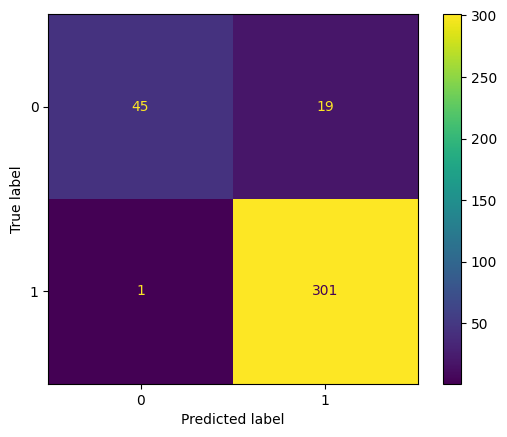

In [68]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train_data, RF_train), display_labels=RF_Classifier.classes_)
cm_display.plot()
plt.show()

In [69]:
print(classification_report(y_test_data, RF_predictions))

              precision    recall  f1-score   support

           0       0.86      0.38      0.52        16
           1       0.88      0.99      0.93        76

    accuracy                           0.88        92
   macro avg       0.87      0.68      0.73        92
weighted avg       0.88      0.88      0.86        92



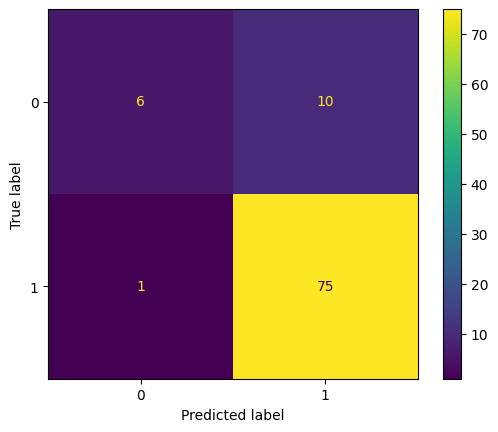

In [70]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_data, RF_predictions), display_labels=RF_Classifier.classes_)
cm_display.plot()
plt.show()

In [71]:
print("Accuracy of unscaled data:", accuracy_score(y_test_data, RF_predictions))

Accuracy of unscaled data: 0.8804347826086957


In [72]:
print("The best paramter we have is: {}" .format(RF_model.best_params_))

The best paramter we have is: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}


# Neural Network

In [73]:
from sklearn.neural_network import MLPClassifier

In [74]:
NN_model = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)

In [75]:
NN_Classifier = NN_model.fit(x_train_data, y_train_data)

c:\Users\hemoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [76]:
NN_Classifier

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [77]:
NN_predictions = NN_Classifier.predict(x_test_data)
NN_train = NN_Classifier.predict(x_train_data)


In [78]:
print(classification_report(y_train_data, NN_train))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84        64
           1       0.95      1.00      0.97       302

    accuracy                           0.95       366
   macro avg       0.96      0.87      0.91       366
weighted avg       0.95      0.95      0.95       366



In [79]:
print(classification_report(y_test_data, NN_predictions))

              precision    recall  f1-score   support

           0       0.90      0.56      0.69        16
           1       0.91      0.99      0.95        76

    accuracy                           0.91        92
   macro avg       0.91      0.77      0.82        92
weighted avg       0.91      0.91      0.90        92



In [80]:
print("Accuracy of unscaled data:", accuracy_score(y_test_data, NN_predictions))

Accuracy of unscaled data: 0.9130434782608695


### decision tree 

In [81]:
from sklearn.tree import DecisionTreeClassifier


classifier = DecisionTreeClassifier( splitter='best')
param_grid = { 
    'max_leaf_nodes': [5, 20],
    'max_depth' : [3,10],
    }
RF_model=GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
RF_Classifier = RF_model.fit(x_train_data, y_train_data) 

In [82]:
DT_predictions = RF_model.predict(x_test_data)
DT_train = RF_model.predict(x_train_data)

In [83]:
print("Accuracy of unscaled data:", accuracy_score(y_train_data, DT_train))

Accuracy of unscaled data: 0.9262295081967213


In [84]:
print("Accuracy of unscaled data:", accuracy_score(y_test_data, DT_predictions))

Accuracy of unscaled data: 0.8913043478260869


In [85]:
dataset.columns

Index(['BreathingProblem', 'Fever', 'DryCough', 'Sorethroat', 'RunningNose',
       'Asthma', 'ChronicLungDisease', 'Headache', 'HeartDisease', 'Diabetes',
       'HyperTension', 'Fatigue ', 'Gastrointestinal ',
       'Contact with COVID Patient', 'WearingMasks', 'COVID-19'],
      dtype='object')

In [86]:
dataset = dataset.rename({'Wearing Masks': 'WearingMasks', 'Breathing Problem': 'BreathingProblem','Dry Cough': 'DryCough', 'Sore throat': 'Sorethroat',
                          'Running Nose': 'RunningNose', 'Chronic Lung Disease': 'ChronicLungDisease',
                          'Heart Disease': 'HeartDisease', 'Hyper Tension': 'HyperTension',
                          'Attended Large Gathering': 'AttendedLargeGathering', 'Visited Public Exposed Places': 'VisitedPublicExposedPlaces',
                          'Family working in Public Exposed Places': 'FamilyworkinginPublicExposedPlaces', 'Hyper Tension': 'HyperTension',
                          ' Sanitization from Market': ' SanitizationfromMarket'}, axis=1)


In [87]:
dataset

,BreathingProblem,Fever,DryCough,Sorethroat,RunningNose,Asthma,ChronicLungDisease,Headache,HeartDisease,Diabetes,HyperTension,Fatigue,Gastrointestinal,Contact with COVID Patient,WearingMasks,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
454,1,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1
455,0,0,1,0,0,1,1,0,1,1,0,0,1,1,0,1
456,1,0,0,0,1,0,1,1,0,1,0,1,1,1,0,1


# LogisticRegression

In [88]:
LogisticRegressionModel = LogisticRegression(solver='sag',C=1.0,random_state=33,max_iter=10000)

LogisticRegressionModel_1=LogisticRegressionModel.fit(x_train_data, y_train_data)



In [89]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel_1.score(x_train_data, y_train_data))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel_1.score(x_test_data, y_test_data))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel_1.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel_1.n_iter_)
print('----------------------------------------------------')




LogisticRegressionModel Train Score is :  0.9316939890710383
LogisticRegressionModel Test Score is :  0.9239130434782609
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [30]
----------------------------------------------------


### SVM

In [90]:
# from sklearn.model_selection import GridSearchCV
  
# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']} 
  
# grid = GridSearchCV(SVC(), param_grid)
  
# # fitting the model for grid search
# grid.fit(x_train_data, y_train_data)

In [91]:

# grid_predictions = grid.predict(x_test_data)
  
# # print classification report
# print(classification_report(y_test, grid_predictions))

# # print best parameter after tuning

# print("The best paramter we have is: {}" .format(grid.best_params_))
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)
# from sklearn.metrics import confusion_matrix, accuracy_score
# print("Accuracy of unscaled data:", accuracy_score(y_test_data, predictions))

In [92]:
mrange = np.arange(0.1, 10.5, 0.5)
# mrange = np.arange(1, 11)

param_grid = {'C': mrange,
              'gamma': mrange,
              'kernel': ['rbf']} 
  
svc_grid = GridSearchCV(SVC(), param_grid, refit=True)
svc_grid.fit(x_train_data, y_train_data)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 0.1,  0.6,  1.1,  1.6,  2.1,  2.6,  3.1,  3.6,  4.1,  4.6,  5.1,
        5.6,  6.1,  6.6,  7.1,  7.6,  8.1,  8.6,  9.1,  9.6, 10.1]),
                         'gamma': array([ 0.1,  0.6,  1.1,  1.6,  2.1,  2.6,  3.1,  3.6,  4.1,  4.6,  5.1,
        5.6,  6.1,  6.6,  7.1,  7.6,  8.1,  8.6,  9.1,  9.6, 10.1]),
                         'kernel': ['rbf']})

In [93]:
# pd.DataFrame(svc_grid.cv_results_)

In [94]:
print(f"Best Parameters: {svc_grid.best_params_} with best score {svc_grid.best_score_}")
# Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'} with best score 0.9345057386153275

Best Parameters: {'C': 5.1, 'gamma': 0.1, 'kernel': 'rbf'} with best score 0.9345057386153275


In [95]:
svc_train_grid = svc_grid.predict(x_train_data)
svc_pred_grid = svc_grid.predict(x_test_data)

In [96]:
print(classification_report(y_train_data,svc_train_grid))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85        64
           1       0.95      1.00      0.97       302

    accuracy                           0.95       366
   macro avg       0.96      0.87      0.91       366
weighted avg       0.95      0.95      0.95       366



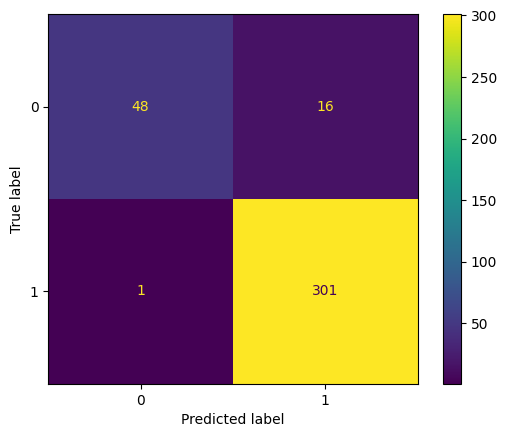

In [97]:
# type = df.TYPE.value_counts().index.values
# type = ["ALLERGY", "COLD", "COVID", "FLU"]
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train_data,svc_train_grid)
                                    , display_labels=svc_grid.classes_)
cm_display.plot()
plt.show()

In [98]:
print(classification_report(y_test_data,svc_pred_grid))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74        16
           1       0.93      0.99      0.96        76

    accuracy                           0.92        92
   macro avg       0.92      0.81      0.85        92
weighted avg       0.92      0.92      0.92        92



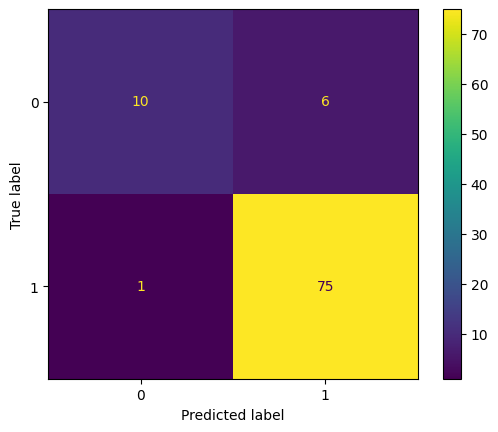

In [99]:
# type = df.TYPE.value_counts().index.values
# type = ["ALLERGY", "COLD", "COVID", "FLU"]
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_data,svc_pred_grid), 
                                    display_labels=svc_grid.classes_)
cm_display.plot()
plt.show()

In [100]:
mrange = np.arange(0.1, 10.5, 0.5)
# mrange = np.arange(1, 11)

param_grid = {'C': mrange,
            #   'gamma': mrange,
              'kernel': ['linear']} 
  
svc_grid = GridSearchCV(SVC(), param_grid, refit=True)
svc_grid.fit(x_train_data, y_train_data)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 0.1,  0.6,  1.1,  1.6,  2.1,  2.6,  3.1,  3.6,  4.1,  4.6,  5.1,
        5.6,  6.1,  6.6,  7.1,  7.6,  8.1,  8.6,  9.1,  9.6, 10.1]),
                         'kernel': ['linear']})

In [101]:
print(f"Best Parameters: {svc_grid.best_params_} with best score {svc_grid.best_score_}")
# 0.9372454646427248

Best Parameters: {'C': 4.1, 'kernel': 'linear'} with best score 0.9372454646427248


In [102]:
mrange = np.arange(0.1, 10.5, 0.5)
# mrange = np.arange(1, 11)

param_grid = {'C': mrange,
            #   'gamma': mrange,
              'degree': np.arange(1,6),
              'kernel': ['poly']} 
  
svc_grid = GridSearchCV(SVC(), param_grid, refit=True)
svc_grid.fit(x_train_data, y_train_data)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 0.1,  0.6,  1.1,  1.6,  2.1,  2.6,  3.1,  3.6,  4.1,  4.6,  5.1,
        5.6,  6.1,  6.6,  7.1,  7.6,  8.1,  8.6,  9.1,  9.6, 10.1]),
                         'degree': array([1, 2, 3, 4, 5]), 'kernel': ['poly']})

In [103]:
print(f"Best Parameters: {svc_grid.best_params_} with best score {svc_grid.best_score_}")
# 0.9372454646427248

Best Parameters: {'C': 5.1, 'degree': 1, 'kernel': 'poly'} with best score 0.9372454646427248


In [122]:
mrange = np.arange(0.1, 10.5, 0.5)
# mrange = np.arange(1, 11)

param_grid = {'C': mrange,
              'gamma': mrange,
            #   'degree': np.arange(1,6),
              'kernel': ['poly','linear','sigmoid','rbf']} 
  
svc_grid_2 = GridSearchCV(SVC(probability=True), param_grid, refit=True,cv=3)
svc_grid_2.fit(x_train_data, y_train_data)

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': array([ 0.1,  0.6,  1.1,  1.6,  2.1,  2.6,  3.1,  3.6,  4.1,  4.6,  5.1,
        5.6,  6.1,  6.6,  7.1,  7.6,  8.1,  8.6,  9.1,  9.6, 10.1]),
                         'gamma': array([ 0.1,  0.6,  1.1,  1.6,  2.1,  2.6,  3.1,  3.6,  4.1,  4.6,  5.1,
        5.6,  6.1,  6.6,  7.1,  7.6,  8.1,  8.6,  9.1,  9.6, 10.1]),
                         'kernel': ['poly', 'linear', 'sigmoid', 'rbf']})

In [123]:
print(f"Best Parameters: {svc_grid_2.best_params_} with best score {svc_grid_2.best_score_}")

Best Parameters: {'C': 6.6, 'gamma': 0.1, 'kernel': 'rbf'} with best score 0.9344262295081966


In [124]:
svc_train_grid = svc_grid_2.predict(x_train_data)
svc_pred_grid = svc_grid_2.predict(x_test_data)

In [107]:
print(classification_report(y_train_data,svc_train_grid))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85        64
           1       0.95      1.00      0.97       302

    accuracy                           0.95       366
   macro avg       0.96      0.87      0.91       366
weighted avg       0.95      0.95      0.95       366



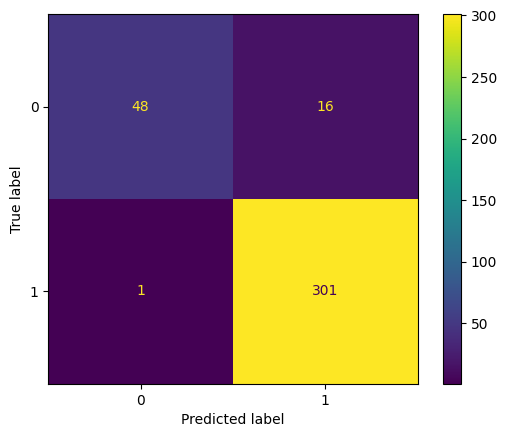

In [125]:
# type = df.TYPE.value_counts().index.values
# type = ["ALLERGY", "COLD", "COVID", "FLU"]
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train_data,svc_train_grid)
                                    , display_labels=svc_grid_2.classes_)
cm_display.plot()
plt.show()

In [126]:
print(classification_report(y_test_data,svc_pred_grid))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.94      0.99      0.96        76

    accuracy                           0.93        92
   macro avg       0.93      0.84      0.87        92
weighted avg       0.93      0.93      0.93        92



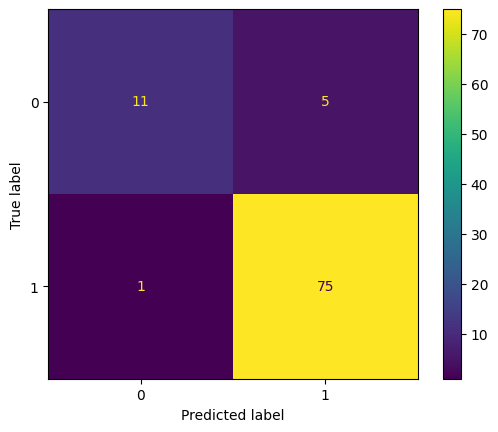

In [127]:
# type = df.TYPE.value_counts().index.values
# type = ["ALLERGY", "COLD", "COVID", "FLU"]
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_data,svc_pred_grid), 
                                    display_labels=svc_grid_2.classes_)
cm_display.plot()
plt.show()

In [131]:
import pickle
pickle.dump(svc_grid_2, open('svc_grid_covid.sav', 'wb'))

In [132]:
x=svc_grid.predict_proba(x_test_data)

In [133]:
x

array([[0.02720511, 0.97279489],
       [0.15815346, 0.84184654],
       [0.82045251, 0.17954749],
       [0.18887936, 0.81112064],
       [0.27175463, 0.72824537],
       [0.08922605, 0.91077395],
       [0.12087566, 0.87912434],
       [0.54547396, 0.45452604],
       [0.01509335, 0.98490665],
       [0.02427317, 0.97572683],
       [0.13091159, 0.86908841],
       [0.10922036, 0.89077964],
       [0.07974087, 0.92025913],
       [0.02847821, 0.97152179],
       [0.03611897, 0.96388103],
       [0.40532843, 0.59467157],
       [0.0673807 , 0.9326193 ],
       [0.04531403, 0.95468597],
       [0.04390333, 0.95609667],
       [0.97622778, 0.02377222],
       [0.50889569, 0.49110431],
       [0.09944757, 0.90055243],
       [0.873436  , 0.126564  ],
       [0.05442203, 0.94557797],
       [0.04820492, 0.95179508],
       [0.08302476, 0.91697524],
       [0.05213152, 0.94786848],
       [0.04326728, 0.95673272],
       [0.06730192, 0.93269808],
       [0.09588441, 0.90411559],
       [0.

 # ensamble

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [115]:
log = LogisticRegression()
rnd = RandomForestClassifier(bootstrap = True, max_depth= 60, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 60)
svm = SVC()

In [116]:
voting = VotingClassifier(
    estimators=[('logistics_regression', log), ('random_forest', rnd), ('support_vector_machine', svm)],
    voting='hard' , weights=[1,2,1] )

In [117]:
voting.fit(x_train_data, y_train_data)

VotingClassifier(estimators=[('logistics_regression', LogisticRegression()),
                             ('random_forest',
                              RandomForestClassifier(max_depth=60,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=60)),
                             ('support_vector_machine', SVC())],
                 weights=[1, 2, 1])

In [118]:
for clf in (log, rnd, svm, voting):
    clf.fit(x_train_data, y_train_data)
    y_pred = clf.predict(x_test_data)
    print(clf.__class__.__name__, accuracy_score(y_test_data, y_pred))

LogisticRegression 0.9239130434782609
RandomForestClassifier 0.8695652173913043
SVC 0.8695652173913043
VotingClassifier 0.8804347826086957


In [119]:
# import colorama
# from colorama import Fore

# print("COVID PREDICTION BASED ON ML ALGORITHMS")
# print("Enter 1 for Yes and 0 for No")
# BreathingProblem = int(input("Does the patient have breathing problem ? "))
# Fever = int(input("Does the patient have fever ? "))
# DryCough = int(input("Does the patient have dry cough ? "))
# Sorethroat = int(input("Does the patient have sore throat ? "))
# RunningNose = int(input("Does the patient have running nose ? ")) 
# Asthma = int(input("Does the patient have any record of asthma ? ")) 
# ChronicLungDisease = int(input("Does the patient have any records of chronic lung disease ? ")) 
# Headache = int(input("Is the patient having headche ? "))
# HeartDisease = int(input("Does the patient have any record of any heart disease ? "))
# Diabetes = int(input("Does the patient have diabetes ? "))
# HyperTension = int(input("Does the patient have hyper tension ? ")) 
# Fatigue = int(input("Does the patient experience fatigue ? "))
# Gastrointestinal = int(input("Does the patient have any gastrointestinal disorders ? "))
# Abroadtravel = int(input("Has the patient travelled abroad recently ? "))
# ContactwithCOVIDPatient = int(input("Was the patient in contact with a covid patient recently ? "))
# AttendedLargeGathering = int(input("Did the patient attend any large gathering event recently ? "))
# VisitedPublicExposedPlaces = int(input("Did the patient visit any public exposed places recently ? "))
# FamilyworkinginPublicExposedPlaces = int(input("Does the patient have any family member working in public exposed places ? "))
# WearingMasks = int(input("Does the patient have Wearing Masks ? "))
# SanitizationfromMarket = int(input("Does the patient have SanitizationfromMarket ? "))



# patient = [[BreathingProblem,Fever,DryCough,Sorethroat,RunningNose,Asthma,ChronicLungDisease,Headache,HeartDisease,Diabetes,HyperTension,Fatigue,Gastrointestinal,Abroadtravel,ContactwithCOVIDPatient,AttendedLargeGathering,VisitedPublicExposedPlaces,FamilyworkinginPublicExposedPlaces,WearingMasks,SanitizationfromMarket]]
# result = KNN_Classifier.predict(patient)
# print("\nResults : ",result)

# if result == 1:
#     print(Fore.RED + 'You may be affected with COVID-19 virus! Please get RTPCR test ASAP and stay in Quarantine for 14 days!')
#     print()
# else :
#     print(Fore.GREEN + 'You do not have any symptoms of COVID-19. Stay home! Stay safe!')
#     print()

In [120]:
# dataset.columns

In [121]:
# dataset.to_csv('covid.csv')